In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
blockdf=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\ethdata.csv")
pricedf=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\priceandvolume.csv",thousands=',')
addresses=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\uniqueaddresses.csv")
trend=pd.read_csv( r"C:\Users\Jimmy\Desktop\Data606\Data\googletrends.csv")

In [3]:
#fields identified from EDA:
#addresses, fee, high,low,open,close, volume

In [4]:
#set index to datetime
blockdf['Date'] = pd.to_datetime(blockdf['date'])
blockdf.set_index('Date' ,inplace=True)

In [5]:
#set index to datetime
addresses['date'] = pd.to_datetime(addresses['date'])
addresses.set_index('date' ,inplace=True)

In [6]:
#merging identified data
df = pd.DataFrame()
#df['PriceUSD']=blockdf['PriceUSD'] #removing this is have pricing from another dataframe
df['TxCnt']=blockdf['TxCnt']
df['FeeMeanUSD']=blockdf['FeeMeanUSD']
df['AdrActCnt']=blockdf['AdrActCnt']
df['TotalAddresses']=addresses

In [7]:
addresses.head()
pricedf.dtypes

Date           object
Open*         float64
High          float64
Low           float64
Close**       float64
Volume          int64
Market Cap      int64
dtype: object

In [8]:
df

,TxCnt,FeeMeanUSD,AdrActCnt,TotalAddresses
Date,,,,
2015-07-30,0,NaN,9206,9203
2015-07-31,0,NaN,424,9359
2015-08-01,0,NaN,413,9474
2015-08-02,0,NaN,432,9561
2015-08-03,0,NaN,444,9637
...,...,...,...,...
2020-02-20,689600,0.193184,317504,35185543
2020-02-21,670542,0.135858,323587,35185543
2020-02-22,605859,0.132280,314925,35185543


In [9]:
#To do: Merge in exchange data and trend data

In [10]:
#set index to datetime
trend['date'] = pd.to_datetime(trend['Week'])
trend.set_index('date' ,inplace=True)


In [11]:
df['Trend']=trend['ethereum: (United States)']

In [12]:
df.head()

,TxCnt,FeeMeanUSD,AdrActCnt,TotalAddresses,Trend
Date,,,,,
2015-07-30,0,NaN,9206,9203,NaN
2015-07-31,0,NaN,424,9359,NaN
2015-08-01,0,NaN,413,9474,NaN
2015-08-02,0,NaN,432,9561,1.0
2015-08-03,0,NaN,444,9637,NaN


In [13]:
#set index to datetime
df['Trend'].fillna(method='ffill',inplace=True) 
#df['trend'].interpolate(method='linear', limit_direction='forward',inplace=True) 

In [14]:
#set index to datetime
pricedf['date'] = pd.to_datetime(pricedf['Date'])
pricedf.set_index('date' ,inplace=True)

In [15]:
#merge in exchange data
df['Open']=pricedf['Open*']
df['Close']=pricedf['Close**']
df['High']=pricedf['High']
df['Low']=pricedf['Low']
df['Volume']=pricedf['Volume']


In [16]:
df.head()

,TxCnt,FeeMeanUSD,AdrActCnt,TotalAddresses,Trend,Open,Close,High,Low,Volume
Date,,,,,,,,,,
2015-07-30,0,NaN,9206,9203,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,0,NaN,424,9359,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0,NaN,413,9474,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-02,0,NaN,432,9561,1.0,NaN,NaN,NaN,NaN,NaN
2015-08-03,0,NaN,444,9637,1.0,NaN,NaN,NaN,NaN,NaN


In [17]:
#removing a few rows that didnt have price data bc ethereum not traded
df = df.truncate(after = '2020-02-23 00:00:00', before = '2015-08-08 00:00:00') 

In [18]:
df['Spread']=df['High']-df['Low']

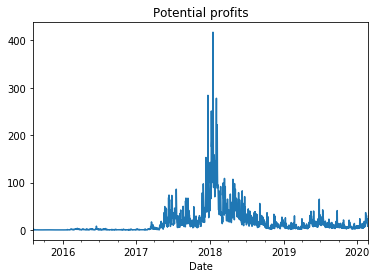

In [19]:
#Calculating the potential intraday profit, if you were to buy at the high and sell at the low, might do something with this later
df['Spread'].plot(title="Potential profits")

In [20]:
df.describe()

,TxCnt,FeeMeanUSD,AdrActCnt,TotalAddresses,Trend,Open,Close,High,Low,Volume,Spread
count,1.661000e+03,1661.000000,1.661000e+03,1.661000e+03,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1.661000e+03,1661.000000
mean,3.880041e+05,0.216513,2.079621e+05,1.148258e+07,12.724865,203.773141,203.882149,211.182710,195.420162,2.661759e+09,15.762548
std,3.206464e+05,0.415907,3.222731e+05,1.214711e+07,18.066598,239.574428,239.415152,250.080294,227.056858,3.813602e+09,30.153669
min,1.329000e+03,0.000690,1.113000e+03,1.060700e+04,1.000000,0.431589,0.434829,0.482988,0.420897,1.021280e+05,0.018745
25%,4.380400e+04,0.009418,1.898800e+04,3.570350e+05,3.000000,11.430000,11.430000,11.790000,11.150000,1.667660e+07,0.700000
50%,4.604190e+05,0.102791,2.155530e+05,5.134649e+06,6.000000,151.970000,152.540000,156.930000,147.610000,1.247880e+09,5.640000
75%,6.545840e+05,0.235910,3.093760e+05,2.215470e+07,14.000000,283.500000,283.740000,293.090000,273.110000,3.617690e+09,17.580000
max,1.349890e+06,5.700029,7.157228e+06,3.518554e+07,100.000000,1397.480000,1396.420000,1432.880000,1290.600000,2.651148e+10,417.090000


In [21]:
#All NAS are gone! DF is compelte!
#Machine learning time
df[df.isnull().any(axis=1)]

,TxCnt,FeeMeanUSD,AdrActCnt,TotalAddresses,Trend,Open,Close,High,Low,Volume,Spread
Date,,,,,,,,,,,


In [22]:
#import necessary libraries for transformations and for xgboost, credit goes to https://www.kaggle.com/mtszkw/stock-trend-and-prices-prediction-using-xgboost
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)



In [23]:
# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'


# Show charts when running kernel
init_notebook_mode(connected=True)
#Need to trim dataframe to a window so that I can actually run functions aginst it



fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=df.index,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [24]:
#Moving averages
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()
df['SMA_30'] = df['Close'].rolling(30).mean().shift()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_5, name='5 day'))
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_15, name='15 day'))
fig.add_trace(go.Scatter(x=df.index, y=df.SMA_30, name='30 day'))
fig.add_trace(go.Scatter(x=df.index, y=df.Close, name='Close', opacity=0.2))
fig.update_layout(
    title="Simple Moving Averages",
    xaxis_title="Date",
    yaxis_title="Ethereum Price",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"))
fig.show()

In [25]:
#remove datetime index
modified = df.reset_index()
modified.head()
df=modified

In [26]:
#Definition taken from:https://www.kaggle.com/wangqiyuan/stock-trend-and-prices-prediction-using-xgboost/notebook
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    Up = delta.copy()
    Down = delta.copy()
    Up[Up < 0] = 0
    Down[Down > 0] = 0
    rollUp = Up.rolling(n).mean()
    rollDown = Down.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = relative_strength_idx(df).fillna(0)

fig = go.Figure(go.Scatter(x=df.Date, y=df.RSI, name='RSI'))
fig.show()

In [27]:
#Create MACD feature, when MACD crosses signal line that is a buy signal. Click to zoom in on graph
EMA_12 = pd.Series(df['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['Close'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD'], name='MACD'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Date, y=df['MACD_signal'], name='Signal'), row=1, col=1)
fig.show()

In [28]:
#Shift label column because I want to predict next days closing price

df['Close'] = df['Close'].shift(-1)

In [29]:
df = df.iloc[33:] # Need to remove due to MACD creating NAN values
df = df[:-1]      # Because of shifting close price

#df.index = range(len(df))

In [30]:
test_size  = 0.10
valid_size = 0.20

test_split_idx  = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))

train  = df.loc[:valid_split_idx].copy()
valid  = df.loc[valid_split_idx+1:test_split_idx].copy()
test   = df.loc[test_split_idx+1:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.Date, y=train.Close, name='Training'))
fig.add_trace(go.Scatter(x=valid.Date, y=valid.Close, name='Validation'))
fig.add_trace(go.Scatter(x=test.Date,  y=test.Close,  name='Test'))
fig.show()

In [31]:
#removing the other exchange data columns as these would all be unknown
drop_cols = ['Date', 'Volume', 'Open', 'Low', 'High']

train = train.drop(drop_cols, 1)
valid = valid.drop(drop_cols, 1)
test  = test.drop(drop_cols, 1)

In [32]:
y_train = train['Close'].copy()
X_train = train.drop(['Close'], 1)

y_valid = valid['Close'].copy()
X_valid = valid.drop(['Close'], 1)

y_test  = test['Close'].copy()
X_test  = test.drop(['Close'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 33 to 1138
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TxCnt           1106 non-null   int64  
 1   FeeMeanUSD      1106 non-null   float64
 2   AdrActCnt       1106 non-null   int64  
 3   TotalAddresses  1106 non-null   int64  
 4   Trend           1106 non-null   float64
 5   Spread          1106 non-null   float64
 6   SMA_5           1106 non-null   float64
 7   SMA_15          1106 non-null   float64
 8   SMA_30          1106 non-null   float64
 9   RSI             1106 non-null   float64
 10  MACD            1106 non-null   float64
 11  MACD_signal     1106 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 103.8 KB


In [33]:
%%time

#These are default parameters taken from tutorial, will need to play around to optmize
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best paramaters: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best paramaters: {'gamma': 0.02, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'random_state': 42}
Best validation score = -0.4099784160440523
Wall time: 12min 10s


In [34]:
#df.dtypes

In [35]:
%%time

model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

Wall time: 883 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.02,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [36]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:10]}')
print(f'y_pred = {y_pred[:10]}')

y_true = [208.71 186.61 188.5  185.44 185.69 194.49 203.09 196.57 186.89 191.33]
y_pred = [195.74554 201.59679 200.97018 201.97292 201.2377  198.59285 201.94124
 201.94124 201.94124 201.24501]


In [37]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 1525.100536063215


In [38]:
predicted_prices = df.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                         name='Actual',
                         marker_color='Blue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='Red'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Actual',
                         marker_color='Blue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='Red',
                         showlegend=False), row=2, col=1)

fig.show()

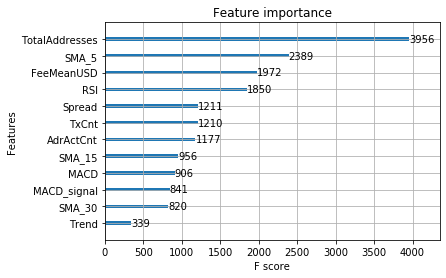

In [39]:
#Lets take a look at our various features performance
plot_importance(model);

In [40]:
#Next steps. More testing,more time windows, refine model, stream in live data if time
# Could potentially bring back more features that I removed, Now that I have a smaller dataset it would be easy to do without making the training take too long